## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization.In this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute.

## Question 1 Text Classification

In the first question you will be dealing with 20 News Group Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on the News Group Dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

The 20 newsgroups dataset comprises around 20000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [1]:
# importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# add more packages
from typing import Dict
from typing import Set
from typing import List
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score
from collections import defaultdict
from nltk.corpus import stopwords
import string
import numpy as np
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# Import the 20 news group dataset utilizing sklearn library

mydata_train: any = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

mydata_test: any = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))


In [3]:
# Print the news groups(target) in the dataset

print(list(mydata_train.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
# What is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils._bunch.Bunch'>
<class 'sklearn.utils._bunch.Bunch'>


In [5]:
# Check the length of the data

print('The length of the {} is {}' .format('`mydata_train.data`', len(mydata_train.data)))
print('The length of the {} is {}' .format('`mydata_train.filenames`', len(mydata_train.filenames)))
print('The length of the {} is {}' .format('`mydata_test.data`', len(mydata_test.data)))
print('The length of the {} is {}' .format('`mydata_test.filenames`', len(mydata_test.filenames)))

The length of the `mydata_train.data` is 11314
The length of the `mydata_train.filenames` is 11314
The length of the `mydata_test.data` is 7532
The length of the `mydata_test.filenames` is 7532


### Expected Output:
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [6]:
text: any = mydata_train.data
test: any = mydata_test.data

## Preprocessing the Corpus

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Andy
[nltk_data]     Cui\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# Clean corpus
def clean_corpus(line: list[str]) -> list[str]:
    '''
    preprocess and clean a given line.
    
    - line: The text line to be cleaned.
    ---
    - list: A list of preprocessed tokens from the line.
    '''
    
    # Followed as1 method to clean data
    # Remove links
    line: list[str] = re.sub(r'http\S+', '', line)
    
    # Convert the line to lowercase
    line: list[str] = line.lower()
    
    # Remove punctuation from the line
    line: list[str] = ''.join([char for char in line if char not in string.punctuation])
    
    # Tokenize
    tokens: list[str] = nltk.word_tokenize(line)
    
    # Remove stop words
    tokens: list[str] = [token for token in tokens if token not in stop_words]
    
    # Stemming
    tokens: list[str] = [stemmer.stem(token) for token in tokens]
    
    return tokens

In [9]:
# Preprocessing the data

lines: list[list[str]] = []
word_list: list[str] = []

# Predefined list of stop words
stop_words: set = set(stopwords.words('english'))
stemmer: any = PorterStemmer()

# Tokenize the text documents and update the lists word_list and lines
lines = [clean_corpus(line) for line in text]
# print(len(lines))
word_list: list[str] = [token for line in lines for token in line]

# Make sure the word_list contains unique tokens
word_list: list[str] = list(set(word_list))

# Calculate the total documents present in the corpus
total_docs: int = len(lines)

#Create a dictionary to keep track of index of each word
dict_idx: defaultdict[int, int] = defaultdict(int)
for idx, word in enumerate(word_list):
    dict_idx[word] = idx

In [10]:
# Create a frequency dictionary

def frequency_dict(lines: str) -> dict[str, int]: 
    '''
    create a frequency dictionary
    
    - lines: list containing all the tokens
    ---
    - freq_word: returns a dictionary which keeps the count of the number of documents 
        containing the given word.
    '''
    # Initialize the frequency dictionary
    freq_word: dict[str, int] = defaultdict(int)  
    
    for line in lines:
        
        # This set will keep track of words already counted for the current line
        seen_words: set[str] = set() 
         
        for word in line:
            if word not in seen_words:
                freq_word[word] += 1
                seen_words.add(word)

    return freq_word

In [11]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word: dict[str, int] = frequency_dict(lines)

freq_word

defaultdict(int,
            {'wonder': 452,
             'anyon': 1399,
             'could': 1674,
             'enlighten': 28,
             'car': 485,
             'saw': 266,
             'day': 845,
             '2door': 3,
             'sport': 105,
             'look': 1562,
             'late': 207,
             '60': 198,
             'earli': 268,
             '70': 121,
             'call': 1169,
             'bricklin': 3,
             'door': 142,
             'realli': 1074,
             'small': 433,
             'addit': 307,
             'front': 232,
             'bumper': 23,
             'separ': 211,
             'rest': 335,
             'bodi': 285,
             'know': 2460,
             'tellm': 1,
             'model': 320,
             'name': 676,
             'engin': 343,
             'spec': 106,
             'year': 1418,
             'product': 343,
             'made': 808,
             'histori': 298,
             'whatev': 293,
             'info':

# Formular of Term Frequency(TF)

- TF = $\frac{Number \ of \ times \ term \ t \ appears \ in \ a \ document}{Total \ number \ of \ terms \ in \ the \ document}$

In [12]:
# Create a function to calculate the Term Frequency

def term_frequency(document: list[str], word: str) -> float:
    '''
    calculating the term frequency(tf)
    
    - document: list containing the entire corpus
    - word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    
    # Count the total number of tokens in the document
    total_terms: int = len(document)

    # Count the number of times the word appears in the document
    word_count: int = document.count(word)
    
    # Calculate Term Frequency
    tf: float = word_count / total_terms if total_terms > 0 else 0.0

    return tf

# Formular of Inverse Document Frequency(IDF) 

- IDF = log $\frac{Total \ number \ of \ documents}{Number \ of \ documents \ containing \ term \ t}$

In [13]:
print(freq_word[word])

1


In [14]:
# Create a function to calculate the Inverse Document Frequency

def inverse_df(word: str) -> float:
    '''
    calculate the Inverse Document Frequency(IDF)
    
    - word: word whose inverse document frequency is to be calculated
    ---
    - idf: return inverse document frequency value
    '''
    # Count the number of documents containing the word
    docs_containing_word: dict[str, int] = freq_word[word]
    
    # Calculate Inverse Document Frequency
    # Avoid division by zero in case the word is not present in any document.
    idf: float = math.log(total_docs / (1 + docs_containing_word)) if docs_containing_word + 1 <= total_docs else math.log(1)
    
    return idf

# Formulat of TF-IDF

- TF-IDF(t) = TF(t) x IDF(t)
- We calculate each words in sentence

In [15]:
# Create a function to combine the term frequencies (TF) 
#   and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence: list, dict_idx: dict) -> list[float]:
    '''
    combin the TF and IDF to calculate above to get TF-IDF
    
    - sentence: list containing the entire corpus
    - dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    
    # Init the tf-idf
    tf_idf_vec: list[str] = [0.0] * len(dict_idx)
    
    # Calculate each words tfidf in sentence
    for word in sentence:
        if word in dict_idx:
            tf_val = term_frequency(sentence, word)
            idf_val = inverse_df(word)
            tfidf_val = tf_val * idf_val        
            # Use the index from the dictionary to set the value
            tf_idf_vec[dict_idx[word]] = tfidf_val

    return tf_idf_vec

In [16]:
# Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus
tfidf_val_list: List[List[float]] = []

for sentence in lines:
    tfidf_val = tfidf(sentence, dict_idx)
    tfidf_val_list.append(tfidf_val)
    # print(tfidf_val)

In [17]:
# check len
lengths: int = [len(vec) for vec in tfidf_val_list]
unique_lengths: set = set(lengths)
print(unique_lengths)

{88104}


# Fixed length trouble from the `tfidf`
- I found we need use len(dict_idx) to init the tf_idf_vec, if not we might get many different length data. 

## Multinomial Naive Bayes (10 Points)

In [18]:
# use our tfidf to train our MNB(Multinomial Naive Bayes)

x_train = np.array(tfidf_val_list)
print('x_train length:', len(x_train))
y_train = mydata_train.target
print('y_train length:', len(y_train))
model = MultinomialNB(alpha = 0.01)
model.fit(x_train, y_train)


x_train length: 11314
y_train length: 11314


MultinomialNB(alpha=0.01)

In [19]:
# Perform testing on the train dataset

pred: any = model.predict(x_train)

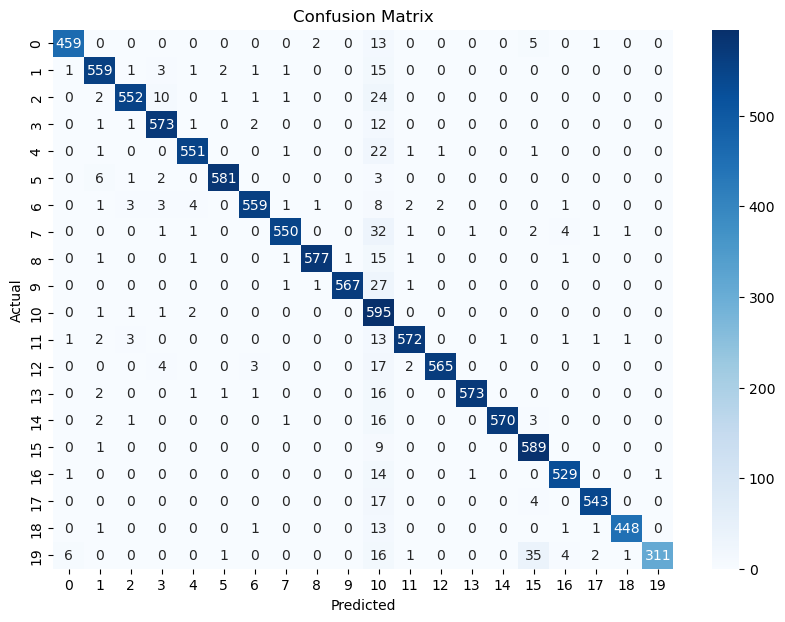

In [20]:
# Confusion matrix
conf_mat = confusion_matrix(y_train, pred)

plt.figure(figsize = (10, 7))
sns.heatmap(conf_mat, annot = True, cmap = "Blues", fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [21]:
# Classification report 
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       480
           1       0.96      0.96      0.96       584
           2       0.98      0.93      0.96       591
           3       0.96      0.97      0.97       590
           4       0.98      0.95      0.97       578
           5       0.99      0.98      0.99       593
           6       0.98      0.96      0.97       585
           7       0.99      0.93      0.96       594
           8       0.99      0.96      0.98       598
           9       1.00      0.95      0.97       597
          10       0.66      0.99      0.79       600
          11       0.98      0.96      0.97       595
          12       0.99      0.96      0.97       591
          13       1.00      0.96      0.98       594
          14       1.00      0.96      0.98       593
          15       0.92      0.98      0.95       599
          16       0.98      0.97      0.97       546
          17       0.99    

In [22]:
# Calculate the F1 Score and the Accuracy

F1_score: float = f1_score(y_train, pred, average='weighted')
Accuracy: float = accuracy_score(y_train, pred)

print(f"F1 Score: {F1_score} \t percentage: {F1_score * 100:.2f}%")
print(f"Accuracy: {Accuracy} \t percentage: {Accuracy * 100:.2f}%")


F1 Score: 0.958746143094483 	 percentage: 95.87%
Accuracy: 0.9566024394555418 	 percentage: 95.66%


# Analysis:
- For my model, the $\alpha$ = 0.01 is a good smoothing value, since we can choose this value from 0 to 1, its use for Lapace smoothing. 

### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly.
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [23]:
# install libraries
# pip install wikipedia

In [24]:
# Import package 
import wikipedia
from wikipedia.exceptions import WikipediaException
from typing import Dict, List

In [25]:
'''
 Generate a list of wikipedia article to cluster
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science",
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund",
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with.
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics_dict: Dict[str, list[str]] = {
    "GPCR Drug Support": [
        "Nanobody Screening Technology",
        "Protein Chemistry",
        "Computational Biology", 
        "Structural Biology", 
        "Molecular Pharmacology", 
        "Antibody", 
        "Variable domain of heavy chain",
        "Purification",
        "Human antigen"
    ],
    "Traditional Biotech": [
        "Cell Biology", 
        "Taxonomy", 
        "Ecology",  
        "Evolution", 
        "Physiology",
        "Botany",
        "Zoology",
        "Microbiology",
        "Anatomy"
    ],
    "Traditional Chemistry": [
        "Organic Chemistry",
        "Inorganic Chemistry",
        "Physical Chemistry",
        "Analytical Chemistry", 
        "Biochemistry", 
        "Theoretical Chemistry", 
        "Nuclear Chemistry",
        "Electrochemistry", 
        "Environmental Chemistry"
    ],
    "Traditional Pharmacology": [
        "Pharmacodynamics",
        "Pharmacokinetics",
        "Toxicology",
        "Clinical Pharmacology",
        "Neuropharmacology",
        "Psychopharmacology",
        "Cardiovascular Pharmacology",
        "Endocrine Pharmacology",
        "Chemotherapy"
    ]
}

# download and store articles (summaries) in this variable
data: List[str] = []
categories: List[str] = []

for category, topics in topics_dict.items():
    for topic in topics:
        try:
            summary = wikipedia.summary(topic)
            data.append((summary, category))
        except wikipedia.exceptions.DisambiguationError as e:
            try:
                # Attempt to get the summary for the first option
                summary = wikipedia.summary(e.options[0])
                data.append((summary, category))
            except WikipediaException:
                print(f"Error retrieving the article for {topic} using option {e.options[0]}")
        except Exception as e:
            print(f"Error retrieving the article {topic}: {e}")

print(len(data))

c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


36


In [28]:
# Check the articals
print('Summary:')
for summary in data:
    print(summary)
    
print('Topics:')
for article in topics_dict:
    print(article)

Summary:
('Antibody-oligonucleotide conjugates or AOCs belong to a class of chimeric molecules combining in their structure two important families of biomolecules: monoclonal antibodies and oligonucleotides.Combination of exceptional targeting capabilities of monoclonal antibodies with numerous functional modalities of oligonucleotides has been fruitful for a variety of applications with AOC including imaging, detection and targeted therapeutics.Cell uptake/internalisation still represents the biggest hurdle towards successful ON therapeutics. A straightforward uptake, like for most small-molecule drugs, is hindered by the polyanionic backbone  and the molecular size of ONs. Being adapted from the broad and successful class of Antibody-Drug conjugates, antibodies and antibody analogues are more and more used in research in order to overcome hurdles related to delivery and internalisation of ON therapeutics. By exploiting bioconjugation methodology several conjugates have been obtained.

### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):**

- I think we need to clean that. Since we download the data base on `wikipedia`，so Wikipedia summaries might contain information that's not directly related to the main topic or might contain introductory phrases or extraneous details. So, we need to clean data followed assignment 1, this is thus, different articles might have different writing styles, tenses, or formats. Standardizing the text can help algorithms process it more efficiently. 

In [29]:
# You can use Assignment 1's clean message function
# Import Package
import re
import nltk
import string

In [30]:
# Download datalib
nltk.download('punkt')
nltk.download('stopwords')

# Define stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to C:\Users\Andy
[nltk_data]     Cui\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Andy
[nltk_data]     Cui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# Clean message
def clean_message(message: str) -> list[str]: 
    '''
    preprocess and clean a given message.
    
    - message: The text message to be cleaned
    ---
    - cleaned_message: A cleaned and preprocessed version of the message.
    '''
    # Remove links
    message = re.sub(r'http\S+', '', message)
    
    # Convert the message to lowercase
    message = message.lower()
    
    # Remove punctuation from the message
    message = ''.join([char for char in message if char not in string.punctuation])
    
    # Tokenize
    tokens = nltk.word_tokenize(message)
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Stemming
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Convert tokens back to a single string message
    cleaned_message = ' '.join(tokens)
    
    return cleaned_message

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

lines: list[list[str]] = []
lines = [clean_message(item[0]) for item in data]
vectorizer: any = TfidfVectorizer()
x = vectorizer.fit_transform(lines)

In [33]:
print(vectorizer.get_feature_names_out(), '\n')
print(x.shape)

['10' '1114' '14' ... 'φύσις' 'ψῡχή' 'ἀνατομή'] 

(36, 1584)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [34]:
from sklearn.manifold import TSNE

# Transform the vectorized data using TSNE
tsne: any = TSNE(n_components = 2, random_state = 42)
x_tsne: any = tsne.fit_transform(x.toarray())

Plot and annotate the points with different markers for different expected groups.

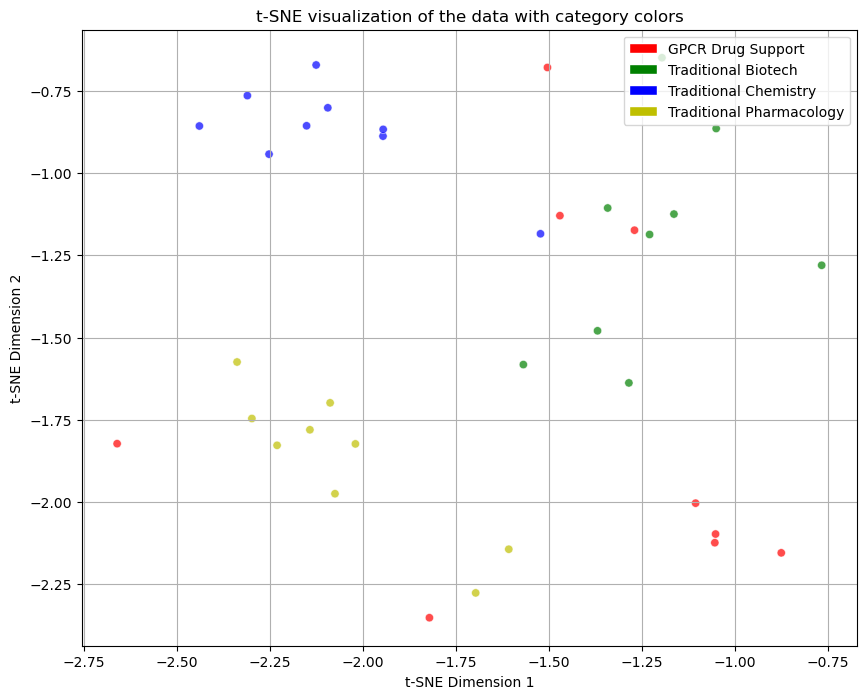

In [35]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Create a color map for each category
color_map = {
    "GPCR Drug Support": 'r',
    "Traditional Biotech": 'g',
    "Traditional Chemistry": 'b',
    "Traditional Pharmacology": 'y'
}

# Extract the categories and transform them to colors using the color map
colors = [color_map[category] for _, category in data]

# Create legend elements
legend_elements = [Patch(facecolor=color_map[key], edgecolor='w', label=key) for key in color_map.keys()]

# get a figure handle
fig,ax = plt.subplots(figsize = (10, 8))

# Plot the t-SNE results on the figure and axis handles
ax.scatter(x_tsne[:, 0], x_tsne[:, 1], c=colors, alpha=0.7, edgecolors='w', linewidth=0.5)
ax.legend(handles = legend_elements, loc='upper right')

ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_title('t-SNE visualization of the data with category colors')

ax.grid(True)
plt.show()

**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
- I did analysis about GPCR tech, since I worked for nanobody biotech company. 
- This observation seems logical given the nature of GPCR (G Protein-Coupled Receptors). GPCRs
  represent the largest family of membrane proteins in the human genome. Their primary function is to transduce extracellular signals through intracellular signaling pathways, leading to various cellular physiological responses. Considering this, it makes sense that there is a significant overlap with biotechnological aspects, as both areas delve deep into cellular functions and mechanisms.
- The sparse overlap with Traditional Chemistry, on the other hand, underscores the fact that  
 while chemistry forms the basis for many biological interactions, the specific study of GPCRs is more biologically inclined than purely chemical.

 - In conclusion, the visualization offers a promising indication of the model's validity, as the
  observed associations align well with the underlying science of GPCRs.

# Question 3 Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc..,

### We are providing train.txt and val.txt files along with this notebook.

### Library Imports and Utility functions

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to C:\Users\Andy
[nltk_data]     Cui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Andy
[nltk_data]     Cui\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Andy
[nltk_data]     Cui\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [37]:
# Import the train.txt and val.txt file into pandas dataframe format

# train
train = pd.read_csv('train-1.txt', sep=';', header=None, names=['text', 'emotion'])

# validation
val = pd.read_csv('val-1.txt', sep=';', header=None, names=['text', 'emotion'])

# and printout the train.shape and validation.shape
print("Train shape:", train.shape)
print("Train Data Samples:")
print(train.head())

print("Validation shape:", val.shape)
print("\nValidation Data Samples:")
print(val.head())
# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)

Train shape: (16000, 2)
Train Data Samples:
                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
Validation shape: (2000, 2)

Validation Data Samples:
                                                text  emotion
0  im feeling quite sad and sorry for myself but ...  sadness
1  i feel like i am still looking at a blank canv...  sadness
2                     i feel like a faithful servant     love
3                  i am just feeling cranky and blue    anger
4  i can have for a treat or if i am feeling festive      joy


In [38]:
# clean the text in the train and validation dataframes using the clean_text function provided above
train['cleaned_text'] = train['text'].apply(lambda x: clean_text(x))
val['cleaned_text'] = val['text'].apply(lambda x: clean_text(x))

sample_data_train = train.head(5)[['text', 'cleaned_text']]
print("Sample Data Comparison for train:")
print(sample_data_train)

print("Sample Data Comparison for validation:")
sample_data_val = val.head(5)[['text', 'cleaned_text']]
print(sample_data_val)

Sample Data Comparison for train:
                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                        cleaned_text  
0                              didnt feel humiliated  
1  go feeling hopeless damned hopeful around some...  
2          im grabbing minute post feel greedy wrong  
3  ever feeling nostalgic fireplace know still pr...  
4                                    feeling grouchy  
Sample Data Comparison for validation:
                                                text  \
0  im feeling quite sad and sorry for myself but ...   
1  i feel like i am still looking at a blank canv...   
2                     i feel like a faithful servant   
3                  i am just feeling

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# initialise count vectorizer from sklearn module with default parameter
vectorizer = CountVectorizer()

# fit on train dataset and transform both train and validation dataset
x_train_count = vectorizer.fit_transform(train['cleaned_text'])
x_val_count = vectorizer.transform(val['cleaned_text'])

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialise tfidf vectorizer from sklearn module with default parameter
tfidf_vectorizer = TfidfVectorizer()

# fit on train dataset and transform both train and validation dataset
x_train_tfidf = tfidf_vectorizer.fit_transform(train['cleaned_text'])
x_val_tfidf = tfidf_vectorizer.transform(val['cleaned_text'])

In [41]:
print(train.columns)
print(val.columns)

Index(['text', 'emotion', 'cleaned_text'], dtype='object')
Index(['text', 'emotion', 'cleaned_text'], dtype='object')


In [42]:
from sklearn.preprocessing import LabelEncoder

# initialise label encoder from sklearn module
label_encoder = LabelEncoder()


# fit on train labels and transform both train and validation labels
label_encoder.fit(train['emotion'])
y_train = label_encoder.transform(train['emotion'])
y_val = label_encoder.transform(val['emotion'])
num_classes = len(np.unique(y_train))

In [43]:
import numpy as np

# convert the labels into one hot encoding form
from sklearn.preprocessing import OneHotEncoder

# Ensure the label-encoded target values have the right shape
y_train_le = np.reshape(y_train, (-1, 1))
y_val_le = np.reshape(y_val, (-1, 1))

# initialise the one-home encoder
one_hot_encoder = OneHotEncoder(sparse_output = False)
y_train = one_hot_encoder.fit_transform(y_train_le)
y_val = one_hot_encoder.transform(y_val_le)
num_classes = y_train.shape[1]

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (20 points)

In [44]:
import tensorflow as tf

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):

  # layer 1 : input layer
  inp = tf.keras.Input((X.shape[1],))

  # layer 2 : add the dense layer with 2048 units and relu activation
  x = tf.keras.layers.Dense(2048, activation = 'relu')(inp)

  # layer 3 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)
  
  # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(1024, activation = 'tanh', kernel_regularizer = 'l2')(x)

  # layer 5 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)
  
  # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(512, activation = 'tanh', kernel_regularizer = 'l2')(x)
  
  # layer 7 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(256, activation = 'tanh', kernel_regularizer = 'l2')(x)
  
  # layer 9 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(128, activation = 'tanh', kernel_regularizer = 'l2')(x)
  
  # layer 11 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)
  
  # layer 12 : output layer with units equal to number of classes and activation as softmax
  out = tf.keras.layers.Dense(num_classes, activation = 'softmax')(x)
  
  # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy
  model = tf.keras.Model(inputs = inp, outputs = out)
  model.compile(loss = 'categorical_crossentropy', 
                optimizer = 'rmsprop',
                metrics=['AUC', 'Precision', 'Recall', 'Accuracy'])
   
  return model


In [45]:
# call the build_model function and initialize the model

x_train_dense = x_train_count.toarray()
x_val_dense = x_val_count.toarray()

model = build_model(x_train_dense)

print(y_train.shape)
print(x_train_dense)

(16000, 6)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [46]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [51]:
import tensorflow as tf
if tf.test.is_gpu_available():
    print("GPU is available")
else:
    print("GPU is not available")

GPU is not available


In [52]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs are available:", gpus)
else:
    print("No GPU found.")

No GPU found.


In [ ]:
# train and validate the model on the count vectors of text which we have created initially for 10 epochs,
# adjust batch size according to your computation power (suggestion use : 8)



case_cv = model.fit(x_train_dense, y_train, 
                    epochs = 10, 
                    batch_size = 8, 
                    validation_data = (x_val_dense, y_val))

Epoch 1/10
2000/2000 [==============================] - 455s 227ms/step - loss: 1.2015 - auc: 0.9126 - precision: 0.7481 - recall: 0.5844 - Accuracy: 0.6844 - val_loss: 1.2418 - val_auc: 0.9109 - val_precision: 0.7480 - val_recall: 0.5935 - val_Accuracy: 0.6880
Epoch 2/10
1659/2000 [=======================>......] - ETA: 1:09 - loss: 1.1708 - auc: 0.9182 - precision: 0.7551 - recall: 0.6046 - Accuracy: 0.6928

KeyboardInterrupt: 

In [ ]:
print(case_cv.history.keys())

dict_keys(['loss', 'auc', 'precision', 'recall', 'Accuracy', 'val_loss', 'val_auc', 'val_precision', 'val_recall', 'val_Accuracy'])


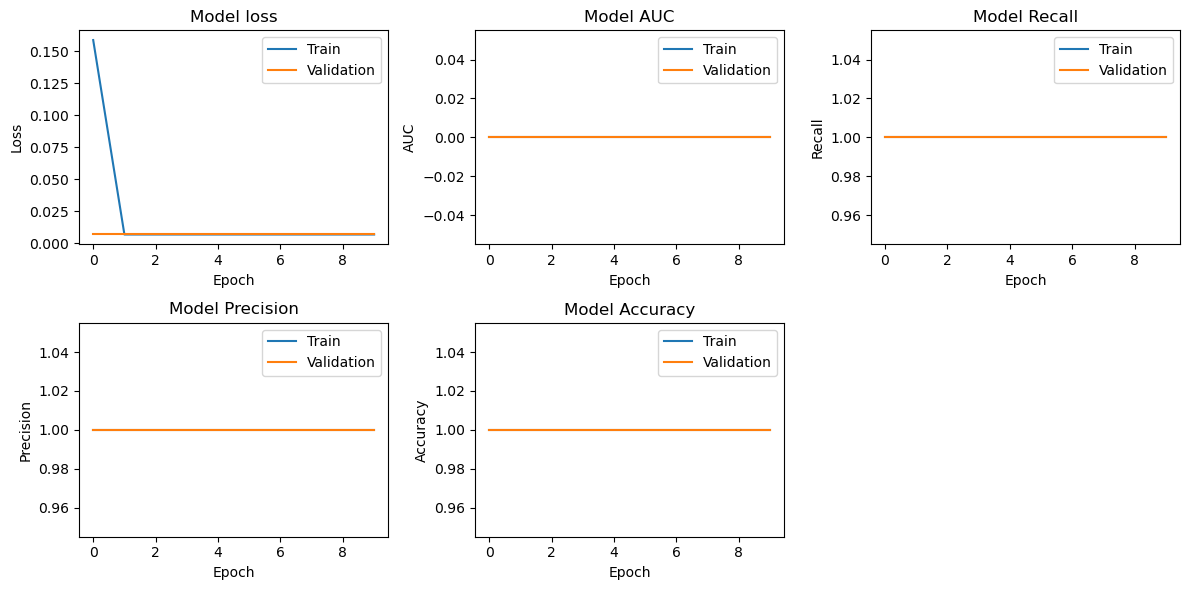

In [ ]:
import matplotlib.pyplot as plt

# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
plt.figure(figsize = (12, 6))

plt.subplot(2, 3, 1)
plt.plot(case_cv.history['loss'])
plt.plot(case_cv.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')

plt.subplot(2, 3, 2)
plt.plot(case_cv.history['auc'])
plt.plot(case_cv.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')

plt.subplot(2, 3, 3)
plt.plot(case_cv.history['recall'])
plt.plot(case_cv.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')

plt.subplot(2, 3, 4)
plt.plot(case_cv.history['precision'])
plt.plot(case_cv.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')

plt.subplot(2, 3, 5)
plt.plot(case_cv.history['Accuracy'])
plt.plot(case_cv.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')

plt.tight_layout()
plt.show()

In [ ]:
# again call the build_model function and initialize the model
x_train_dense = x_train_tfidf.toarray()
x_val_dense = x_val_tfidf.toarray()

model = build_model(x_train_dense)

In [ ]:
# check data
print(x_train_tfidf.shape)
print(y_train.shape)

(16000, 19397)
(11314,)


In [ ]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs,
# adjust batch size according to your computation power (suggestion use : 8)
case_tfidf = model.fit(x_train_dense, y_train, 
                    epochs = 10, 
                    batch_size = 8, 
                    validation_data = (x_val_dense, y_val))

ValueError: Data cardinality is ambiguous:
  x sizes: 16000
  y sizes: 11314
Make sure all arrays contain the same number of samples.

In [ ]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**

What is the significant difference between the Naive Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**